##Albumentation Filter Sample


Development Environment
<br/>Albumentation
<br/>Color Selection
<br/>Blue Transformation
<br/>Olive Transformation
<br/>Green Transformation

#Development Environment

In [ ]:
!pip install -U albumentations

In [ ]:
!pip install PyPDF2

In [ ]:
import albumentations as A
import cv2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
import shutil
import random
from glob import glob

In [ ]:
from termcolor import colored
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
from IPython.display import HTML
from IPython.display import Image
from PyPDF2 import PdfFileReader, PdfFileMerger
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Albumentation

In [ ]:
def transfrom_base(image, transform_way):
  transform = A.Compose([
      transform_way,
  ])
  transforam_image = transform(image=image)['image']
  return transforam_image

In [ ]:
def transform_data(image, color):

  transform_image_list = [image]

  if color == 'blue':
    transform_way = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=[-0.1, 0.0], brightness_by_max=True, always_apply=False, p=1),
    A.Blur(blur_limit=[1, 4], always_apply=False, p=2),
    A.HueSaturationValue(hue_shift_limit=[-10, 10], sat_shift_limit=[-20, 20], val_shift_limit=[-20, 20], always_apply=False, p=0.3),
    ], p=1)

  if color == 'olive':
    transform_way = A.Compose([
    A.Blur(blur_limit=[1, 4], always_apply=False, p=2),
    A.HueSaturationValue(hue_shift_limit=[-10, 25], sat_shift_limit=[-20, 20], val_shift_limit=[-20, 20], always_apply=False, p=0.3),
    ], p=1)

  if color == 'green':
    transform_way = A.Compose([
    A.Blur(blur_limit=[1, 4], always_apply=False, p=2),
    A.HueSaturationValue(hue_shift_limit=[-60, 40], sat_shift_limit=[-20, 20], val_shift_limit=[-20, 20], always_apply=False, p=0.3),
    ], p=1)

  transform_image = transfrom_base(image, transform_way)
  transform_image_list.append(transform_image)

  return transform_image_list

In [ ]:
def transform_data_show(image_path, color):
  image = cv2.imread(image_path)
 
  transformed_image_list = transform_data(image, color)

  transform_way_list = ["Original Image", "Transformed Image"]
  
  file_name = ''.join(s for s in image_path.split("/")[-1])
  file_number = ''.join(s for s in file_name.split(".")[0])

  plt.figure(figsize=(10, 6))
  for i in range(len(transformed_image_list)):
    plt.subplot(1, 2, i+1)
    plt.imshow(transformed_image_list[i])
    plt.title(transform_way_list[i], size=18)
    plt.axis('off')
  plt.suptitle(file_name, size=30)
  plt.show()

  """with PdfPages('/content/drive/MyDrive/Aiffelthon/data_augmentation/pdf/' + file_number + '_sample.pdf') as pdf:

      plt.figure(figsize=(10, 6))
    for i in range(len(transformed_image_list)):
      plt.subplot(1, 2, i+1)
      plt.imshow(cv2.cvtColor(transformed_image_list[i], cv2.COLOR_BGR2RGB))
      plt.title(transform_way_list[i], size=18)
      plt.axis('off')
    plt.suptitle(file_name, size=30)
    plt.show()"""
  
  print("\n"*2)

#Color Selection

In [ ]:
train_ship_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_train_ship_color.csv')
train_vehicle_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_train_vehicle_color.csv')
train_vehicle_ship_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_train_vehicle_ship_color.csv')

In [ ]:
validation_ship_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_validation_ship_color.csv')
validation_vehicle_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_validation_vehicle_color.csv')
validation_vehicle_ship_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_validation_vehicle_ship_color.csv')

In [ ]:
def make_tif_txt_path(difference_df, intersection_df, color, sampling_tif_folder, sampling_txt_folder, copy_tif_folder, copy_txt_folder):

  class_color_tif = list(difference_df[color].dropna()) + list(intersection_df[color].dropna())
  class_color_tif = sorted(class_color_tif, reverse=False)
  class_color_tif = sorted(class_color_tif, key=len)

  class_color_txt = []
  for tif_name in class_color_tif:
    txt_name = tif_name.replace('tif', 'txt')
    class_color_txt.append(txt_name)

  load_class_color_tif_path = []
  save_class_color_tif_path = []
  for tif_file in class_color_tif:
    load_tif_path = sampling_tif_folder + tif_file
    load_class_color_tif_path.append(load_tif_path)

    tif_split = tif_file.split('.')
    save_tif_path = copy_tif_folder + tif_split[0] + '_albu.' + tif_split[1]
    save_class_color_tif_path.append(save_tif_path)


  load_class_color_txt_path = []
  save_class_color_txt_path = []
  for txt_file in class_color_txt:
    load_txt_path = sampling_txt_folder + txt_file
    load_class_color_txt_path.append(load_txt_path)

    txt_split = txt_file.split('.')
    save_txt_path = copy_txt_folder + txt_split[0] + '_albu.' + txt_split[1]
    save_class_color_txt_path.append(save_txt_path)

  return class_color_tif, load_class_color_tif_path, save_class_color_tif_path, \
  class_color_txt, load_class_color_txt_path, save_class_color_txt_path

In [ ]:
sampling_data_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/'
copy_train_tif_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train_albu/'
copy_train_txt_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/train_super_albu/'

train_ship_blue_tif, load_train_ship_blue_tif_path, save_train_ship_blue_tif_path, \
train_ship_blue_txt, load_train_ship_blue_txt_path, save_train_ship_blue_txt_path \
= make_tif_txt_path(train_ship_color_df, train_vehicle_ship_color_df,
                    'blue', sampling_data_folder + 'images_train/', sampling_data_folder + 'train_super/',
                    copy_train_tif_folder, copy_train_txt_folder)

train_ship_olive_tif, load_train_ship_olive_tif_path, save_train_ship_olive_tif_path, \
train_ship_olive_txt, load_train_ship_olive_txt_path, save_train_ship_olive_txt_path \
= make_tif_txt_path(train_ship_color_df, train_vehicle_ship_color_df,
                    'olive', sampling_data_folder + 'images_train/', sampling_data_folder + 'train_super/',
                    copy_train_tif_folder, copy_train_txt_folder)

train_vehicle_green_tif, load_train_vehicle_green_tif_path, save_train_vehicle_green_tif_path, \
train_vehicle_green_txt, load_train_vehicle_green_txt_path, save_train_vehicle_green_txt_path \
= make_tif_txt_path(train_vehicle_color_df, train_vehicle_ship_color_df,
                    'green', sampling_data_folder + 'images_train/', sampling_data_folder + 'train_super/',
                    copy_train_tif_folder, copy_train_txt_folder)

In [ ]:
print("", train_ship_blue_tif[0], "\n", load_train_ship_blue_tif_path[0], "\n", save_train_ship_blue_tif_path[0], "\n",
      train_ship_blue_txt[0], "\n", load_train_ship_blue_txt_path[0]," \n", save_train_ship_blue_txt_path[0])

 6.tif 
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train/6.tif 
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train_albu/6_albu.tif 
 6.txt 
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/train_super/6.txt  
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/train_super_albu/6_albu.txt


#Blue Transformation

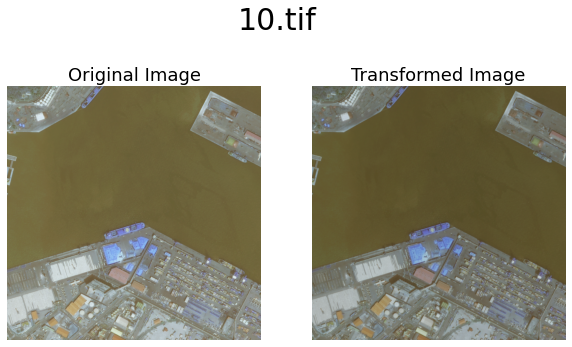

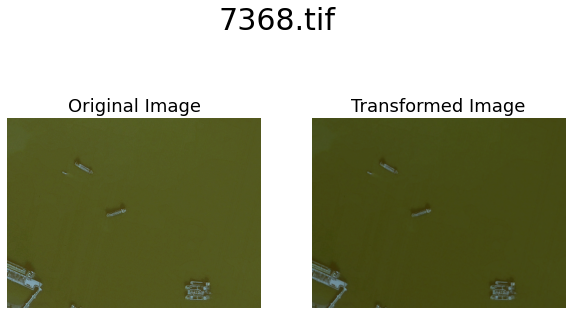

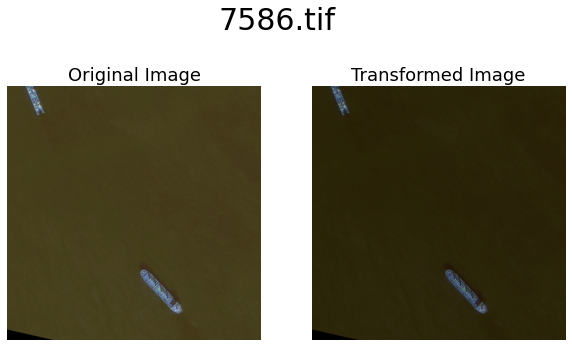

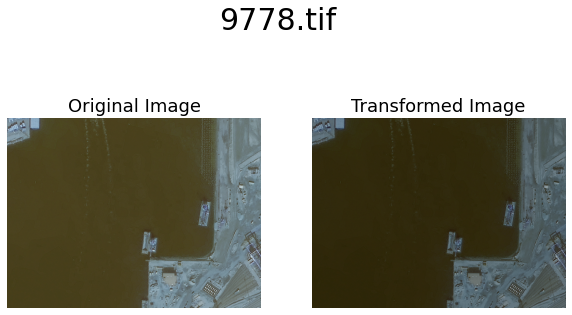

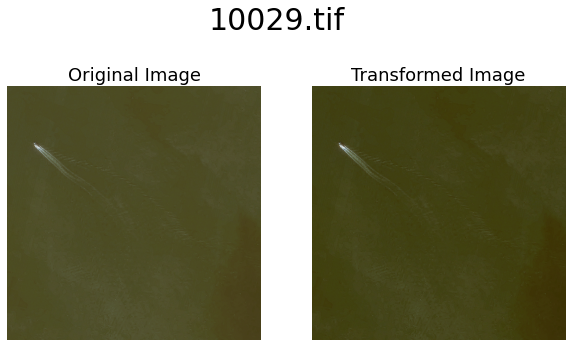

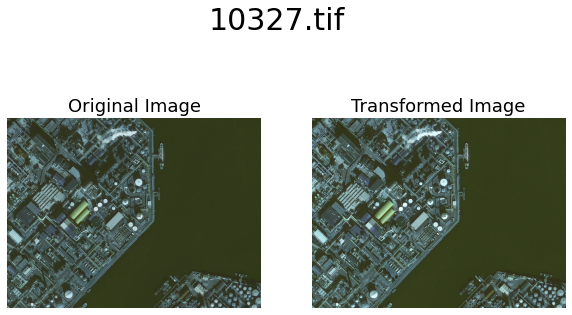

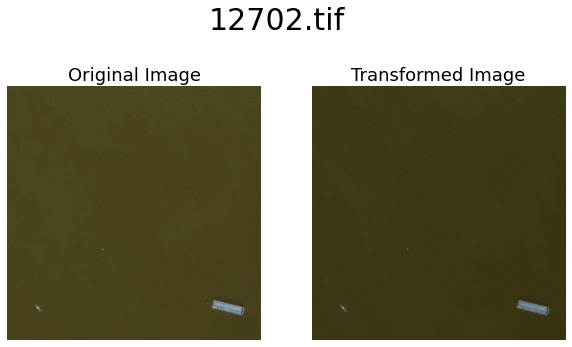

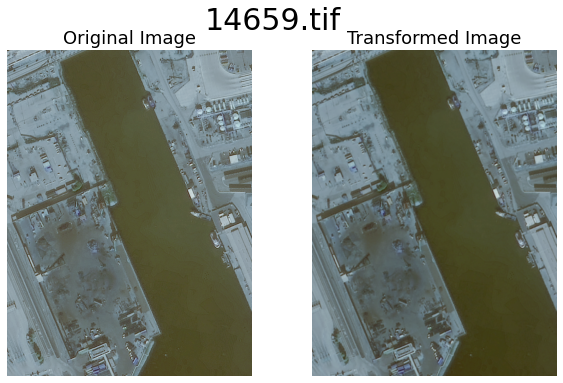

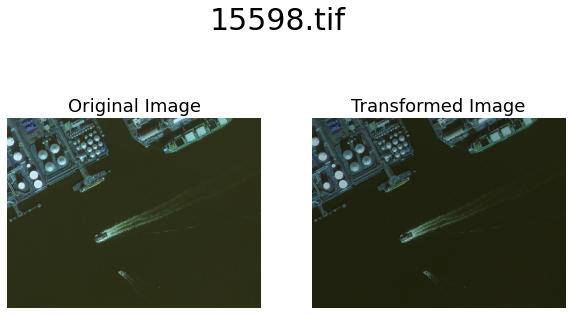

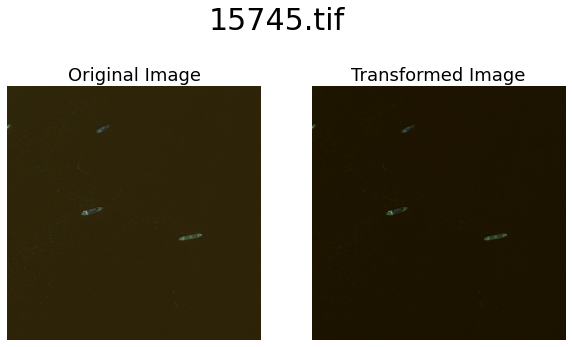

In [ ]:
count = 0
random_numbers = random.sample(range(1, len(train_ship_blue_tif)), 10)

for image_path in load_train_ship_blue_tif_path:
  count += 1
  for random_number in random_numbers:
      if count == random_number:
        transform_data_show(image_path, 'blue')

#Olive Transformation

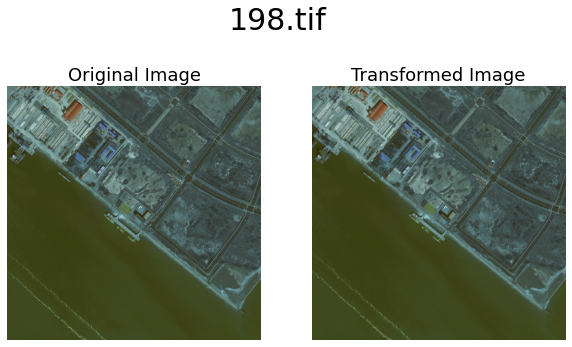

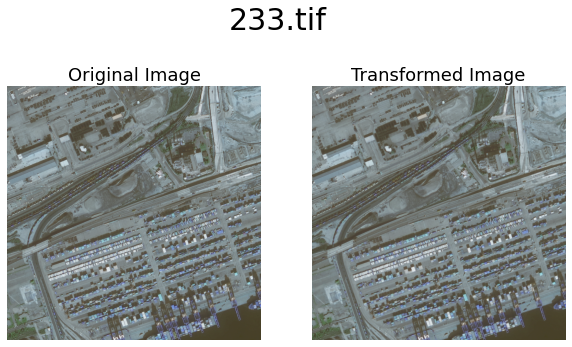

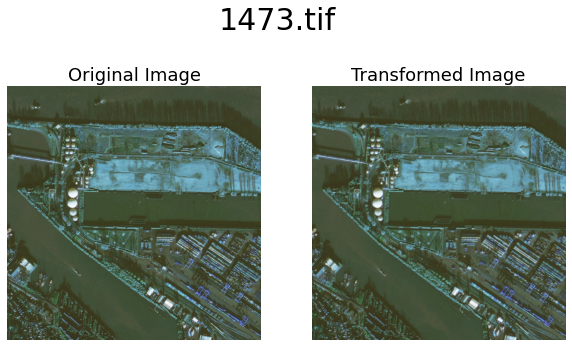

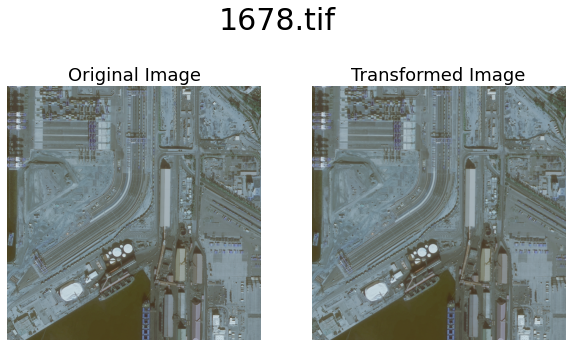

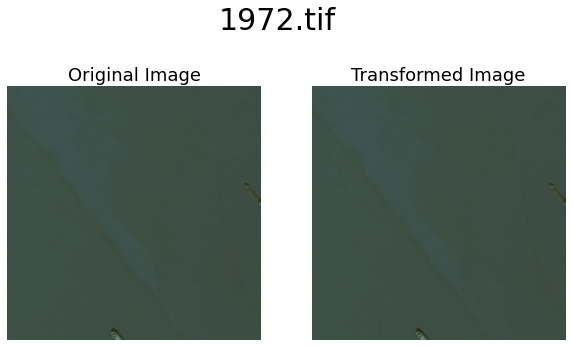

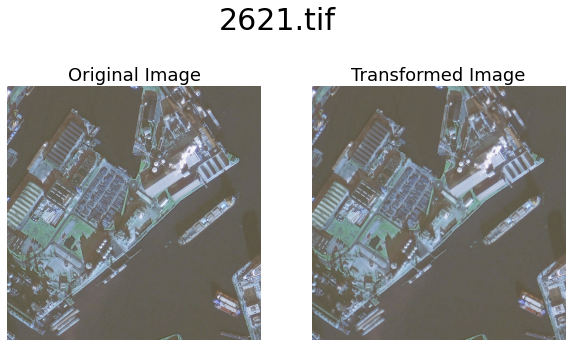

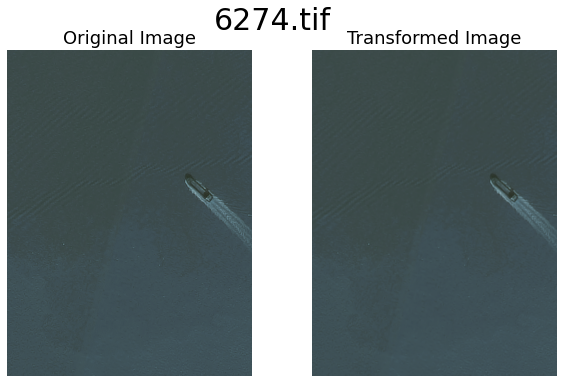

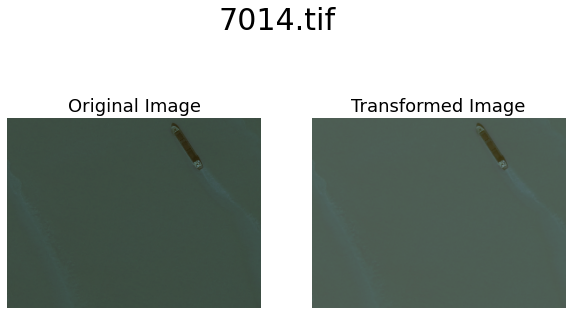

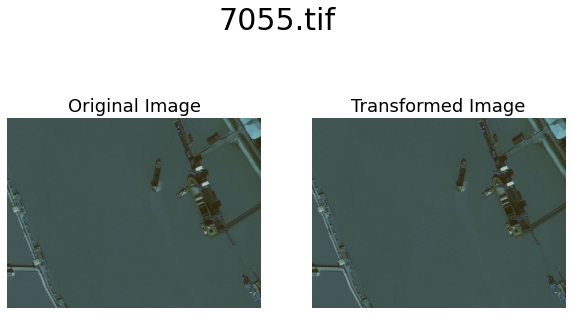

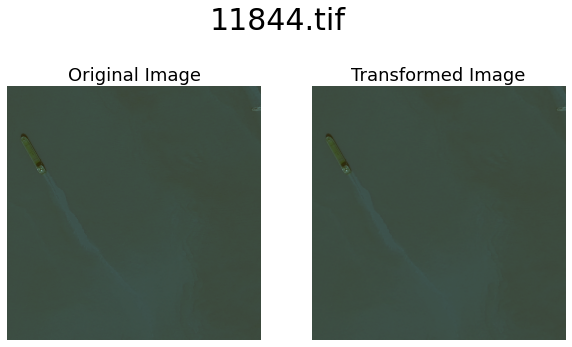

In [ ]:
count = 0
random_numbers = random.sample(range(1, len(train_ship_olive_tif)), 10)

for image_path in load_train_ship_olive_tif_path:
  count += 1
  for random_number in random_numbers:
      if count == random_number:
        transform_data_show(image_path, 'olive')

#Green Transformation

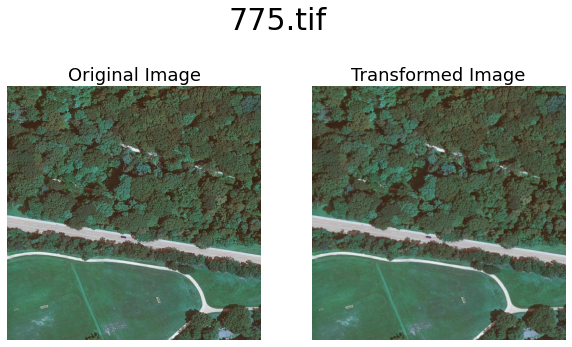

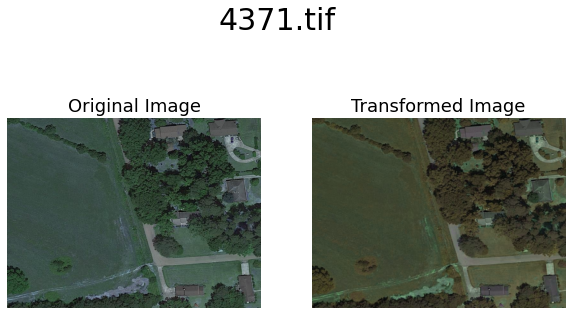

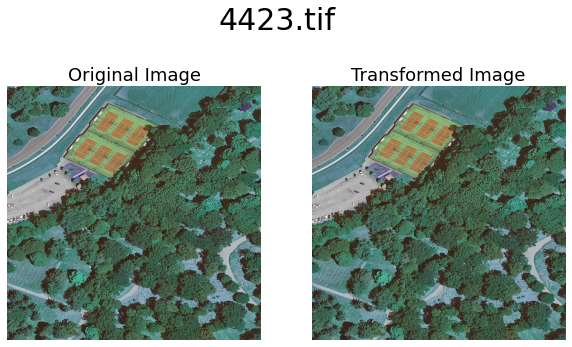

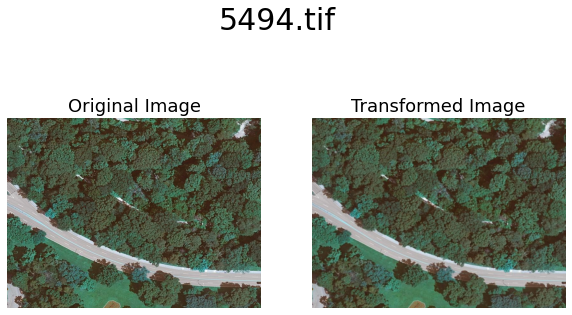

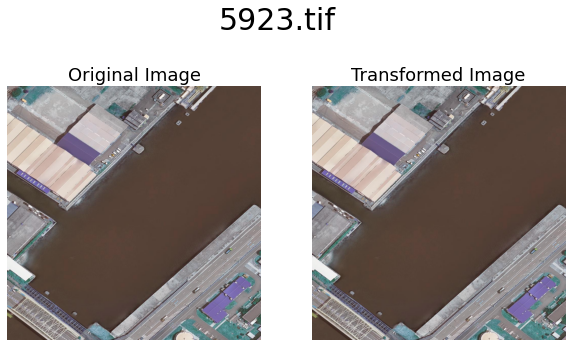

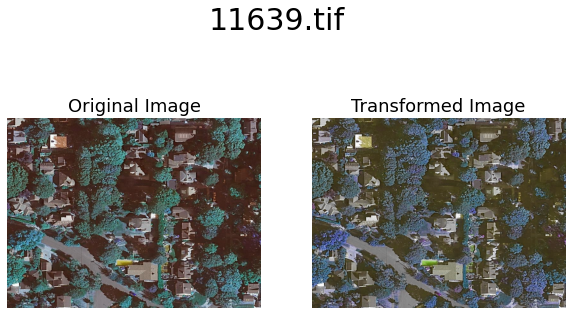

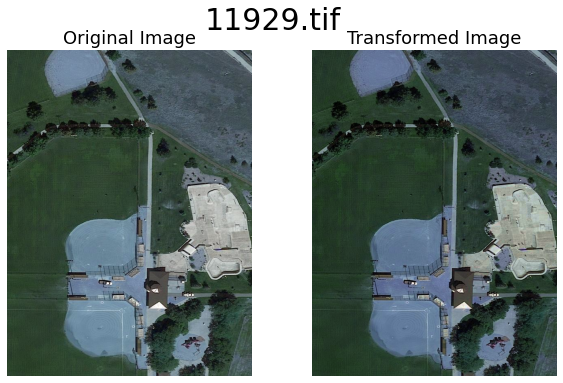

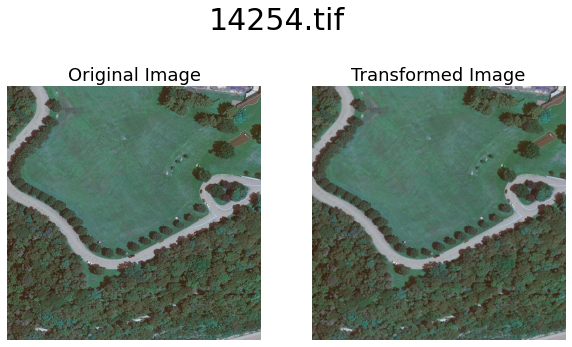

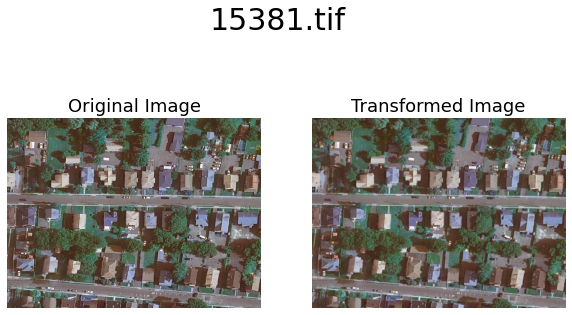

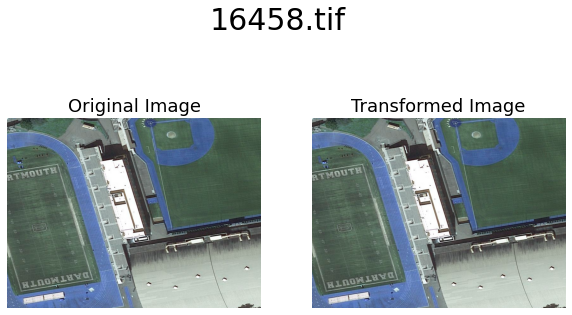

In [ ]:
count = 0
random_numbers = random.sample(range(1, len(train_vehicle_green_tif)), 10)

for image_path in load_train_vehicle_green_tif_path:
  count += 1
  for random_number in random_numbers:
      if count == random_number:
        transform_data_show(image_path, 'green')